In [5]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [6]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w",]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]


lens = [["6", "4"]]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 

# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
# for a in caida0517:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    # for b in caida0816:
    #     for l in lens:
    #         pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap']
Total Pcap File Number: 12


In [7]:
def prepare_are_dict(width):
    ARE_dict = {}
    if width == 1024:
        ARE_dict["caida0517-500w"] = (31.5, 16.41, "cs")
        ARE_dict["caida0517-250w"] = (17.26, 10.83, "cs")
        ARE_dict["caida0517-150w"] = (12.97, 10.25, "cs")
        ARE_dict["caida0517-070w"] = (7.04, 7.16, "cm")
        ARE_dict["caida0517-030w"] = (4.02, 3.80, "cs")
        ARE_dict["zipf2a-150w"] = (6.54, 8.84, "cm")
        ARE_dict["zipf2a-070w"] = (4.07, 4.97, "cm")
        ARE_dict["zipf2a-030w"] = (3.70, 4.35, "cm")
        ARE_dict["zipf10-070w"] = (5.49, 9.15, "cm")
        ARE_dict["zipf10-030w"] = (1.83, 6.43, "cm")
    elif width == 2048:
        ARE_dict["caida0517-500w"] = (11.49, 7.31, "cs")
        ARE_dict["caida0517-250w"] = (5.92, 4.44, "cs")
        ARE_dict["caida0517-150w"] = (5.40, 5.54, "cm")
        ARE_dict["caida0517-070w"] = (2.22, 4.12, "cm")
        ARE_dict["caida0517-030w"] = (1.28, 1.86, "cm")
        ARE_dict["zipf2a-150w"] = (2.37,  1.96, "cs")
        ARE_dict["zipf2a-070w"] = (1.47, 1.451, "cs")
        ARE_dict["zipf2a-030w"] = (1.23, 1.02, "cs")
        ARE_dict["zipf10-070w"] = (1.34, 3.32, "cm")
        ARE_dict["zipf10-030w"] = (0.23, 2.43, "cm")
    elif width == 4096:
        ARE_dict["caida0517-500w"] = (3.76, 3.43, "cs")
        ARE_dict["caida0517-250w"] = (2.11, 1.70, "cs")
        ARE_dict["caida0517-150w"] = (1.58, 1.70, "cm")
        ARE_dict["caida0517-070w"] = (0.61, 1.87, "cm")
        ARE_dict["caida0517-030w"] = (0.26, 0.83, "cm")
        ARE_dict["zipf2a-150w"] = (0.88, 0.90, "cm")
        ARE_dict["zipf2a-070w"] = (0.52, 0.51, "cs")
        ARE_dict["zipf2a-030w"] = (0.43, 0.33, "cs")
        ARE_dict["zipf10-070w"] = (0.42, 1.61, "cm")
        ARE_dict["zipf10-030w"] = (0.01, 0.10, "cm")
    
    return ARE_dict

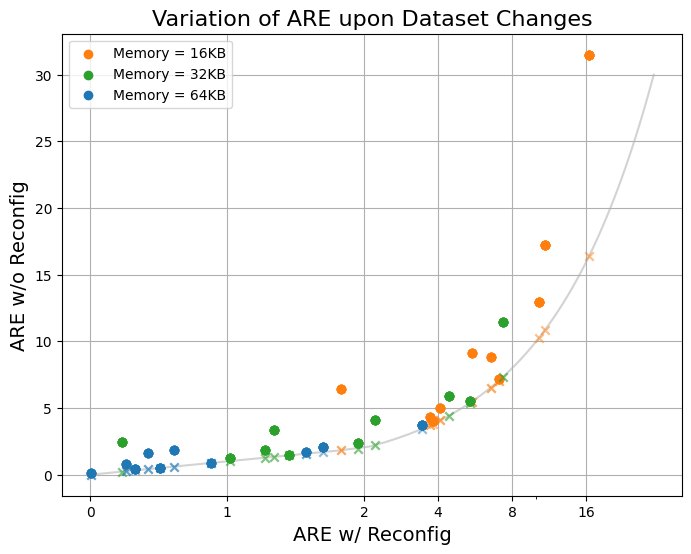

In [20]:
def plot_scatter_diagram_hh():
    pcap_list = caida0517 + zipf2a + zipf10
    widths = [1024, 2048, 4096]
    mem = ["16KB", "32KB", "64KB"]
    color = ["tab:orange", "tab:green", "tab:blue"]
    nodes_sets = []
    for i in range(len(widths)):
        are_dict = prepare_are_dict(widths[i])
        nodes = []
        
        for pcap1 in pcap_list:
            for pcap2 in pcap_list:
                if pcap1 != pcap2:
                    if are_dict[pcap1][2] != are_dict[pcap2][2]: # choose diff algo
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][1]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][0]))
                    else:
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][0]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][1]))
        nodes_sets.append(nodes)
                       

    
    
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(8, 6))
    x_values = np.linspace(0, 30, 100)  # Adjust the range of x-values as needed
    plt.plot(x_values, x_values, color='lightgray', linestyle='-', zorder=1)
    for nodes, col in zip(nodes_sets, color):
        x_coords = [node[0] for node in nodes]
        y_coords = [node[1] for node in nodes]
        plot=0
        for i in range(len(x_coords)):
            # if x_coords[i] >= 20 or y_coords[i] >= 20:
                # continue
            if x_coords[i] != y_coords[i]:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=1.0, marker='o', zorder=2, label=f'Memory = {mem[color.index(col)]}' if plot == 0 else None)  
                plot = 1
            else:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=0.2, marker='x', zorder=2)  

    plt.xlabel('ARE w/ Reconfig', fontsize=14)
    plt.ylabel('ARE w/o Reconfig', fontsize=14)
    plt.title('Variation of ARE upon Dataset Changes', fontsize=16)
    plt.xscale('symlog')
    plt.xticks([0, 1, 2, 4, 8, 16], ['0', '1', '2', '4', '8', '16'])
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_scatter_diagram_hh()

---

In [1]:
def prepare_hh_dict(mem):
    hh_dict = {}
    if mem == "16KB":
        hh_dict["caida0517-500w"] = (31.5, 16.41, 192.12, "cs")
        hh_dict["caida0517-250w"] = (17.26, 10.83, 181.92, "cs")
        hh_dict["caida0517-150w"] = (12.97, 10.25, 177.01, "cs")
        hh_dict["caida0517-070w"] = (7.04, 7.16, 101.93, "cm")
        hh_dict["caida0517-030w"] = (4.02, 3.80, 68.62, "cs")
        hh_dict["zipf2a-150w"] = (6.54, 8.84, 168.38, "cm")
        hh_dict["zipf2a-070w"] = (4.07, 4.97, 139.53, "cm")
        hh_dict["zipf2a-030w"] = (3.70, 4.35, 96.37, "cm")
        hh_dict["zipf10-070w"] = (5.49, 9.15, 74.44, "cm")
        hh_dict["zipf10-030w"] = (1.83, 6.43, 62.33, "cm")
    elif mem == "32KB":
        hh_dict["caida0517-500w"] = (11.49, 7.31, 100.92, "cs")
        hh_dict["caida0517-250w"] = (5.92, 4.44, 75.71, "cs")
        hh_dict["caida0517-150w"] = (5.40, 5.54, 61.42, "cm")
        hh_dict["caida0517-070w"] = (2.22, 4.12, 34.03, "cm")
        hh_dict["caida0517-030w"] = (1.28, 1.86, 25.52, "cm")
        hh_dict["zipf2a-150w"] = (2.37, 1.96, 93.53, "cs")
        hh_dict["zipf2a-070w"] = (1.47, 1.451, 91.07, "cs")
        hh_dict["zipf2a-030w"] = (1.23, 1.02, 45.23, "cs")
        hh_dict["zipf10-070w"] = (1.34, 3.32, 41.41, "cm")
        hh_dict["zipf10-030w"] = (0.23, 2.43, 25.23, "cm")
    elif mem == "64KB":
        hh_dict["caida0517-500w"] = (3.76, 3.43, 54.25, "cs")
        hh_dict["caida0517-250w"] = (2.11, 1.70, 26.64, "cs")
        hh_dict["caida0517-150w"] = (1.58, 1.70, 26.99, "cm")
        hh_dict["caida0517-070w"] = (0.61, 1.87, 12.71, "cm")
        hh_dict["caida0517-030w"] = (0.26, 0.83, 12.42, "cm")
        hh_dict["zipf2a-150w"] = (0.88, 0.90, 64.11, "cm")
        hh_dict["zipf2a-070w"] = (0.52, 0.51, 51.03, "cs")
        hh_dict["zipf2a-030w"] = (0.43, 0.33, 27.70, "cs")
        hh_dict["zipf10-070w"] = (0.42, 1.61, 19.48, "cm")
        hh_dict["zipf10-030w"] = (0.01, 0.10, 8.07, "cm")
    elif mem == "128KB":
        hh_dict["caida0517-500w"] = (1.16, 1.35, 18.70, "cm")
        hh_dict["caida0517-250w"] = (0.84, 1.14, 6.71, "cm")
        hh_dict["caida0517-150w"] = (0.60, 0.97, 8.85, "cm")
        hh_dict["caida0517-070w"] = (0.15, 0.50, 4.98, "cm")
        hh_dict["caida0517-030w"] = (0.04, 0.21, 2.86, "cm")
        hh_dict["zipf2a-150w"] = (0.36, 0.35, 31.17, "cs")
        hh_dict["zipf2a-070w"] = (0.21, 0.43, 16.58, "cm")
        hh_dict["zipf2a-030w"] = (0.13, 0.17, 12.94, "cm")
        hh_dict["zipf10-070w"] = (0.01, 0.72, 1.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.01, 2.84, "cm")
    elif mem == "256KB":
        hh_dict["caida0517-500w"] = (0.44, 0.75, 7.14, "cm")
        hh_dict["caida0517-250w"] = (0.21, 0.58, 2.74, "cm")
        hh_dict["caida0517-150w"] = (0.09, 0.36, 3.34, "cm")
        hh_dict["caida0517-070w"] = (0.04, 0.20, 2.72, "cm")
        hh_dict["caida0517-030w"] = (0.01, 0.06, 0.66, "cm")
        hh_dict["zipf2a-150w"] = (0.14, 0.11, 12.04, "cs")
        hh_dict["zipf2a-070w"] = (0.07, 0.08, 3.83, "cm")
        hh_dict["zipf2a-030w"] = (0.05, 0.07, 1.11, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.09, 0.82, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 1.02, "cm")
    elif mem == "512KB":
        hh_dict["caida0517-500w"] = (0.12, 0.20, 3.62, "cm")
        hh_dict["caida0517-250w"] = (0.04, 0.12, 0.84, "cm")
        hh_dict["caida0517-150w"] = (0.36, 0.16, 0.84, "cs")
        hh_dict["caida0517-070w"] = (0.01, 0.03, 0.40, "cm")
        hh_dict["caida0517-030w"] = (0.0, 0.01, 0.08, "cm")
        hh_dict["zipf2a-150w"] = (0.04, 0.05, 1.50, "cm")
        hh_dict["zipf2a-070w"] = (0.02, 0.04, 2.64, "cm")
        hh_dict["zipf2a-030w"] = (0.01, 0.02, 0.36, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.01, 0.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 0.32, "cm")
        
    return hh_dict

In [2]:
def prepare_fsd_dict(mem):
    fsd_dict = {}
    if mem == "16KB":
        fsd_dict["caida0517-500w"] = (1.82, 1.54, "cs")
        fsd_dict["caida0517-250w"] = (1.54, 1.36, "cs")
        fsd_dict["caida0517-150w"] = (1.41, 1.24, "cs")
        fsd_dict["caida0517-070w"] = (1.06, 0.96, "cs")
        fsd_dict["caida0517-030w"] = (0.96, 0.87, "cs")
        fsd_dict["zipf2a-150w"] = (1.33, 1.10, "cs")
        fsd_dict["zipf2a-070w"] = (1.17, 0.97, "cs")
        fsd_dict["zipf2a-030w"] = (1.22, 0.82, "cs")
        fsd_dict["zipf10-070w"] = (0.82, 0.90, "cm")
        fsd_dict["zipf10-030w"] = (0.40, 0.55, "cm")
    elif mem == "32KB":
        fsd_dict["caida0517-500w"] = (1.61, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.35, 1.18, "cs")
        fsd_dict["caida0517-150w"] = (1.09, 1.07, "cs")
        fsd_dict["caida0517-070w"] = (0.91, 0.87, "cs")
        fsd_dict["caida0517-030w"] = (0.69, 0.66, "cs")
        fsd_dict["zipf2a-150w"] = (1.44, 1.02, "cs")
        fsd_dict["zipf2a-070w"] = (1.07, 0.82, "cs")
        fsd_dict["zipf2a-030w"] = (0.94, 0.69, "cs")
        fsd_dict["zipf10-070w"] = (0.43, 0.61, "cm")
        fsd_dict["zipf10-030w"] = (0.14, 0.31, "cm")
    elif mem == "64KB":
        fsd_dict["caida0517-500w"] = (1.35, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.14, 1.13, "cs")
        fsd_dict["caida0517-150w"] = (1.01, 0.96, "cs")
        fsd_dict["caida0517-070w"] = (0.81, 0.71, "cs")
        fsd_dict["caida0517-030w"] = (0.45, 0.51, "cm")
        fsd_dict["zipf2a-150w"] = (1.03, 0.98, "cs")
        fsd_dict["zipf2a-070w"] = (0.86, 0.74, "cs")
        fsd_dict["zipf2a-030w"] = (0.71, 0.56, "cs")
        fsd_dict["zipf10-070w"] = (0.16, 0.38, "cm")
        fsd_dict["zipf10-030w"] = (0.03, 0.15, "cm")
    elif mem == "128KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.24, "cm")
        fsd_dict["caida0517-250w"] = (1.07, 1.05, "cs")
        fsd_dict["caida0517-150w"] = (0.89, 0.89, "cm")
        fsd_dict["caida0517-070w"] = (0.55, 0.66, "cm")
        fsd_dict["caida0517-030w"] = (0.24, 0.35, "cm")
        fsd_dict["zipf2a-150w"] = (0.94, 0.89, "cs")
        fsd_dict["zipf2a-070w"] = (0.79, 0.68, "cs")
        fsd_dict["zipf2a-030w"] = (0.49, 0.45, "cs")
        fsd_dict["zipf10-070w"] = (0.03, 0.15, "cm")
        fsd_dict["zipf10-030w"] = (0.01, 0.04, "cm")
    elif mem == "256KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.16, "cs")
        fsd_dict["caida0517-250w"] = (1.00, 0.95, "cs")
        fsd_dict["caida0517-150w"] = (0.70, 0.78, "cm")
        fsd_dict["caida0517-070w"] = (0.26, 0.42, "cm")
        fsd_dict["caida0517-030w"] = (0.07, 0.17, "cm")
        fsd_dict["zipf2a-150w"] = (0.93, 0.83, "cs")
        fsd_dict["zipf2a-070w"] = (0.58, 0.58, "cs")
        fsd_dict["zipf2a-030w"] = (0.23, 0.35, "cm")
        fsd_dict["zipf10-070w"] = (0.01, 0.05, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")
    elif mem == "512KB":
        fsd_dict["caida0517-500w"] = (1.07, 1.12, "cm")
        fsd_dict["caida0517-250w"] = (0.57, 0.76, "cm")
        fsd_dict["caida0517-150w"] = (0.36, 0.55, "cm")
        fsd_dict["caida0517-070w"] = (0.08, 0.23, "cm")
        fsd_dict["caida0517-030w"] = (0.02, 0.09, "cm")
        fsd_dict["zipf2a-150w"] = (0.68, 0.72, "cm")
        fsd_dict["zipf2a-070w"] = (0.29, 0.42, "cm")
        fsd_dict["zipf2a-030w"] = (0.09, 0.18, "cm")
        fsd_dict["zipf10-070w"] = (0.0, 0.01, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")    
    
    return fsd_dict


In [3]:
def prepare_ent_dict(mem):
    ent_dict = {}
    if mem == "16KB":
        ent_dict["caida0517-500w"] = (23.56, 60.63, 233.84, "cm")
        ent_dict["caida0517-250w"] = (19.44, 51.58, 188.73, "cm")
        ent_dict["caida0517-150w"] = (16.82, 45.68, 189.01, "cm")
        ent_dict["caida0517-070w"] = (12.12, 35.31, 150.34, "cm")
        ent_dict["caida0517-030w"] = (8.91, 26.3, 111.77, "cm")
        ent_dict["zipf2a-150w"] = (15.68, 39.86, 278.91, "cm")
        ent_dict["zipf2a-070w"] = (12.29, 31.78, 193.12, "cm")
        ent_dict["zipf2a-030w"] = (10.08, 26.88, 166.64, "cm")
        ent_dict["zipf10-070w"] = (7.44, 24.09, 103.00, "cm")
        ent_dict["zipf10-030w"] = (4.47, 14.57, 50.20, "cm")
    elif mem == "32KB":
        ent_dict["caida0517-500w"] = (17.61, 50.30, 118.04, "cm")
        ent_dict["caida0517-250w"] = (13.93, 40.35, 101.52, "cm")
        ent_dict["caida0517-150w"] = (11.81, 35.72, 83.55, "cm")
        ent_dict["caida0517-070w"] = (7.74, 24.58, 69.20, "cm")
        ent_dict["caida0517-030w"] = (5.28, 16.82, 46.20, "cm")
        ent_dict["zipf2a-150w"] = (11.15, 31.64, 134.47, "cm")
        ent_dict["zipf2a-070w"] = (8.55, 25.25, 107.78, "cm")
        ent_dict["zipf2a-030w"] = (6.71, 21.09, 75.39, "cm")
        ent_dict["zipf10-070w"] = (4.24, 14.69, 48.55, "cm")
        ent_dict["zipf10-030w"] = (2.39, 8.06, 16.96, "cm")
    elif mem == "64KB":
        ent_dict["caida0517-500w"] = (12.64, 39.29, 52.38, "cm")
        ent_dict["caida0517-250w"] = (9.45, 30.20, 46.12, "cm")
        ent_dict["caida0517-150w"] = (7.67, 25.63, 36.71, "cm")
        ent_dict["caida0517-070w"] = (4.80, 16.94, 26.65, "cm")
        ent_dict["caida0517-030w"] = (2.91, 9.51, 13.70, "cm")
        ent_dict["zipf2a-150w"] = (7.86, 24.30, 69.31, "cm")
        ent_dict["zipf2a-070w"] = (5.80, 18.83, 53.18, "cm")
        ent_dict["zipf2a-030w"] = (4.31, 12.25, 35.69, "cm")
        ent_dict["zipf10-070w"] = (2.42, 8.31, 22.11, "cm")
        ent_dict["zipf10-030w"] = (1.27, 4.58, 8.50, "cm")
    elif mem == "128KB":
        ent_dict["caida0517-500w"] = (8.55, 29.86, 20.32, "cm")
        ent_dict["caida0517-250w"] = (6.12, 21.92, 14.85, "cm")
        ent_dict["caida0517-150w"] = (4.79, 17.49, 10.28, "cm")
        ent_dict["caida0517-070w"] = (2.75, 10.05, 9.27, "cm")
        ent_dict["caida0517-030w"] = (1.55, 5.47, 0.68, "univmon")
        ent_dict["zipf2a-150w"] = (5.31, 18.85, 32.06, "cm")
        ent_dict["zipf2a-070w"] = (3.80, 14.30, 18.54, "cm")
        ent_dict["zipf2a-030w"] = (2.56, 10.77, 11.13, "cm")
        ent_dict["zipf10-070w"] = (1.06, 3.57, 11.90, "cm")
        ent_dict["zipf10-030w"] = (0.51, 1.75, 1.26, "cm")
    elif mem == "256KB":
        ent_dict["caida0517-500w"] = (5.46, 21.10, 2.28, "univmon")
        ent_dict["caida0517-250w"] = (3.18, 14.52, 2.68, "univmon")
        ent_dict["caida0517-150w"] = (2.75, 10.77, 0.43, "univmon")
        ent_dict["caida0517-070w"] = (1.49, 5.91, 0.85, "univmon")
        ent_dict["caida0517-030w"] = (0.77, 2.90, 5.86, "cm")
        ent_dict["zipf2a-150w"] = (3.44, 14.26, 10.46, "cm")
        ent_dict["zipf2a-070w"] = (2.30, 10.01, 1.30, "univmon")
        ent_dict["zipf2a-030w"] = (1.47, 6.85, 1.36, "univmon")
        ent_dict["zipf10-070w"] = (1.03, 2.09, 9.29, "cm")
        ent_dict["zipf10-030w"] = (0.27, 0.71, 0.22, "univmon")
    elif mem == "512KB":
        ent_dict["caida0517-500w"] = (3.24, 13.81, 3.97, "cm")
        ent_dict["caida0517-250w"] = (2.08, 8.85, 7.92, "cm")
        ent_dict["caida0517-150w"] = (1.46, 6.20, 6.60, "cm")
        ent_dict["caida0517-070w"] = (0.73, 2.95, 2.45, "cm")
        ent_dict["caida0517-030w"] = (0.41, 1.59, 6.74, "cm")
        ent_dict["zipf2a-150w"] = (2.08, 9.64, 0.47, "univmon")
        ent_dict["zipf2a-070w"] = (1.27, 6.17, 3.51, "cm")
        ent_dict["zipf2a-030w"] = (0.81, 3.96, 4.36, "cm")
        ent_dict["zipf10-070w"] = (0.37, 1.03, 7.77, "cm")
        ent_dict["zipf10-030w"] = (0.17, 0.48, 0.25, "cm")


    return ent_dict


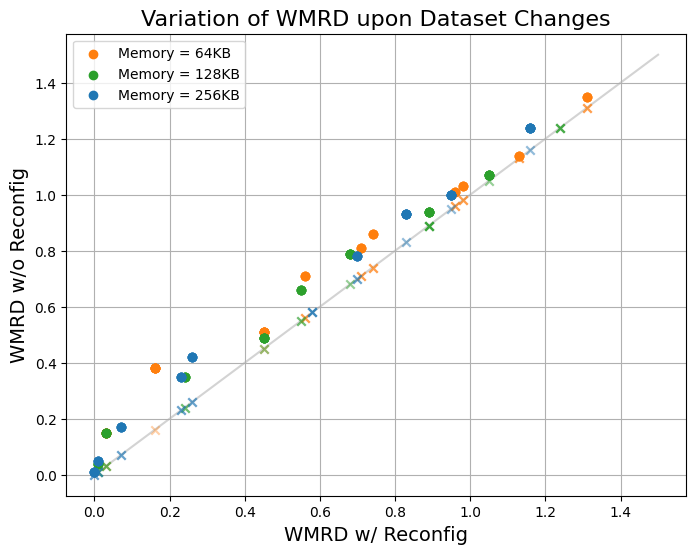

In [28]:
def plot_scatter_diagram_fsd():
    pcap_list = caida0517 + zipf2a + zipf10
    # widths = [1024, 2048, 4096]
    mem = ["64KB", "128KB", "256KB"]
    color = ["tab:orange", "tab:green", "tab:blue"]
    nodes_sets = []
    for i in range(len(mem)):
        are_dict = prepare_fsd_dict(mem[i])
        nodes = []
        
        for pcap1 in pcap_list:
            for pcap2 in pcap_list:
                if pcap1 != pcap2:
                    if are_dict[pcap1][2] != are_dict[pcap2][2]: # choose diff algo
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][1]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][0]))
                    else:
                        if are_dict[pcap2][2] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][0]))
                        else:
                            nodes.append((are_dict[pcap2][1], are_dict[pcap2][1]))
        nodes_sets.append(nodes)
                       

    
    
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(8, 6))
    x_values = np.linspace(0, 1.5, 100)  # Adjust the range of x-values as needed
    plt.plot(x_values, x_values, color='lightgray', linestyle='-', zorder=1)
    for nodes, col in zip(nodes_sets, color):
        x_coords = [node[0] for node in nodes]
        y_coords = [node[1] for node in nodes]
        plot=0
        for i in range(len(x_coords)):
            # if x_coords[i] >= 20 or y_coords[i] >= 20:
                # continue
            if x_coords[i] != y_coords[i]:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=1.0, marker='o', zorder=2, label=f'Memory = {mem[color.index(col)]}' if plot == 0 else None)  
                plot = 1
            else:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=0.2, marker='x', zorder=2)  

    plt.xlabel('WMRD w/ Reconfig', fontsize=14)
    plt.ylabel('WMRD w/o Reconfig', fontsize=14)
    plt.title('Variation of WMRD upon Dataset Changes', fontsize=16)
    # plt.xscale('symlog')
    # plt.xticks([1, 2, 4], ['1', '2','4'])
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_scatter_diagram_fsd()

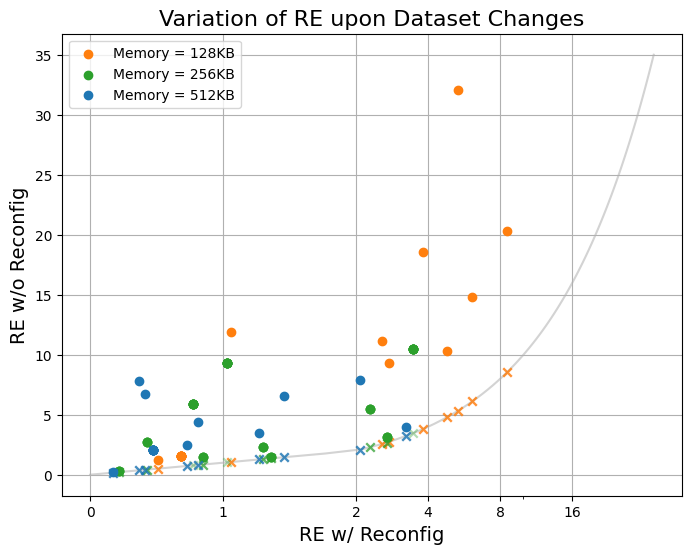

In [21]:
def plot_scatter_diagram_ent():
    pcap_list = caida0517 + zipf2a + zipf10
    # widths = [1024, 2048, 4096]
    mem = ["128KB", "256KB", "512KB"]
    color = ["tab:orange", "tab:green", "tab:blue"]
    nodes_sets = []
    for i in range(len(mem)):
        are_dict = prepare_ent_dict(mem[i])
        nodes = []
        
        for pcap1 in pcap_list:
            for pcap2 in pcap_list:
                if pcap1 != pcap2:
                    if are_dict[pcap1][3] != are_dict[pcap2][3]: # choose diff algo
                        if are_dict[pcap2][3] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][2]))
                        else:
                            nodes.append((are_dict[pcap2][2], are_dict[pcap2][0]))
                    else:
                        if are_dict[pcap2][3] == "cm":
                            nodes.append((are_dict[pcap2][0], are_dict[pcap2][0]))
                        else:
                            nodes.append((are_dict[pcap2][2], are_dict[pcap2][2]))
        nodes_sets.append(nodes)
                       

    
    
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(8, 6))
    x_values = np.linspace(0, 35, 100)  # Adjust the range of x-values as needed
    plt.plot(x_values, x_values, color='lightgray', linestyle='-', zorder=1)
    for nodes, col in zip(nodes_sets, color):
        x_coords = [node[0] for node in nodes]
        y_coords = [node[1] for node in nodes]
        plot=0
        for i in range(len(x_coords)):
            # if x_coords[i] >= 20 or y_coords[i] >= 20:
                # continue
            if x_coords[i] != y_coords[i]:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=1.0, marker='o', zorder=2, label=f'Memory = {mem[color.index(col)]}' if plot == 0 else None)  
                plot = 1
            else:
                plt.scatter(x_coords[i], y_coords[i], color=col, alpha=0.2, marker='x', zorder=2)  

    plt.xlabel('RE w/ Reconfig', fontsize=14)
    plt.ylabel('RE w/o Reconfig', fontsize=14)
    plt.title('Variation of RE upon Dataset Changes', fontsize=16)
    plt.xscale('symlog')
    plt.xticks([0, 1, 2, 4, 8, 16], ['0', '1', '2', '4', '8', '16'])
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_scatter_diagram_ent()